In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = '/home/data/mydata/giaretta/data.npy'

data = np.load(data_path)

In [3]:
data.shape

(883884, 21, 2)

In [4]:
# create mask for time series that have only zeros (bad data)
valid_mask = np.all(~(data==0), axis=1)
valid_mask = np.expand_dims(valid_mask, axis=1)
valid_mask.shape

(883884, 1, 2)

### Statistics of Giaretta dataset
The point here is to check mean and standard deviation of dataset when computed e.g. across all samples (timesteps & features) or across one sample (timesteps & features)

#### Across all samples, timesteps, channels

In [5]:
# exclude zeros
zero_mask = data.ravel() != 0
zero_mask.shape

(37123128,)

##### With zeros

In [6]:
data.ravel().mean(), np.median(data.ravel()), data.ravel().std()

(-9.756962, -10.606184, 7.416879)

##### Without zeros

In [7]:
data.ravel()[zero_mask].mean(), np.median(data.ravel()[zero_mask]), data.ravel()[zero_mask].std()

(-13.682089, -13.203133, 4.8410525)

#### Per-sample across timesteps and channels

##### With zeros

In [8]:
sample_mean = data.mean(axis=(1, 2))
sample_median = np.median(data, axis=(1, 2))
sample_std = data.std(axis=(1, 2))

(-9.756977, -9.677257, 2.8878908)

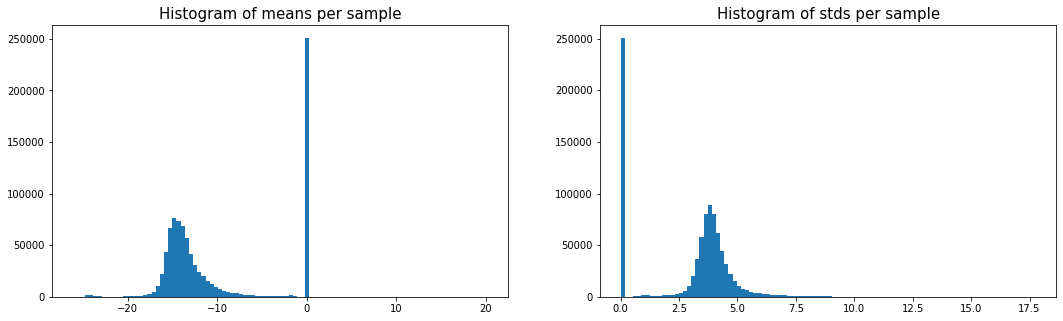

In [9]:
fig, ax = plt.subplots(figsize=(18, 5), ncols=2, nrows=1);
ax[0].hist(sample_mean, bins=100);
ax[0].set_title(label='Histogram of means per sample', fontsize=15)

ax[1].hist(sample_std, bins=100);
ax[1].set_title('Histogram of stds per sample', fontsize=15)

sample_mean.mean(), sample_median.mean(), sample_std.mean()

##### Without zeros

In [10]:
mean_zero_mask = data.mean(axis=(1, 2)) != 0
std_zero_mask = data.std(axis=(1, 2)) != 0

In [11]:
sample_mean = data.mean(axis=(1, 2))[mean_zero_mask]
sample_median = np.median(data, axis=(1, 2))
sample_std = data.std(axis=(1, 2))[std_zero_mask]

(-13.619769, -9.677257, 4.031206)

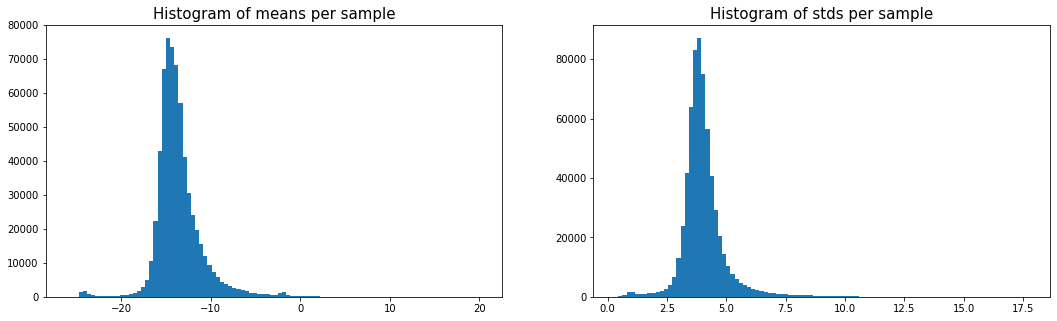

In [12]:
fig, ax = plt.subplots(figsize=(18, 5), ncols=2, nrows=1);
ax[0].hist(sample_mean, bins=100);
ax[0].set_title(label='Histogram of means per sample', fontsize=15)

ax[1].hist(sample_std, bins=100);
ax[1].set_title('Histogram of stds per sample', fontsize=15)

sample_mean.mean(), sample_median.mean(), sample_std.mean()

In [13]:
np.unique(data[:, :, 0])

array([-35.242245, -35.05288 , -33.405525, ...,  26.048649,  26.266224,
        26.305006], dtype=float32)

In [14]:
vv_array = data[:, :, 0].ravel()
vh_array = data[:, :, 1].ravel()

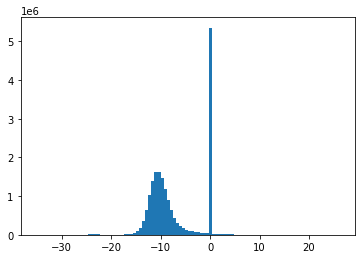

In [15]:
plt.hist(vv_array, bins=100);

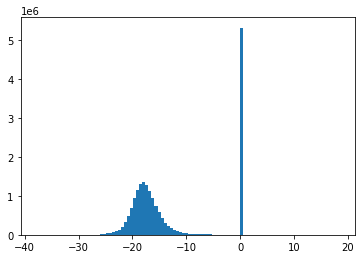

In [16]:
plt.hist(vh_array, bins=100);

In [17]:
vv_array_inv = 10**(vv_array/10)
vh_array_inv = 10**(vh_array/10)

ValueError: not enough values to unpack (expected 2, got 0)

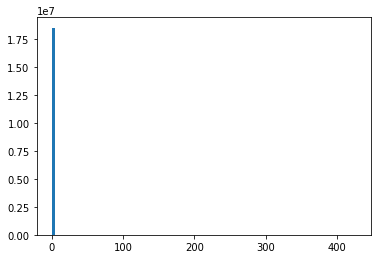

In [18]:
plt.hist(vv_array_inv, bins=100);
plt.xlim([])

In [19]:
np.mean(vv_array_inv), np.min(vv_array_inv), np.max(vv_array_inv)

(0.40950036, 0.0002990718, 427.07147)

In [20]:
np.mean(vh_array_inv), np.min(vh_array_inv), np.max(vh_array_inv)

(0.3054096, 0.00016005182, 71.86074)

In [21]:
np.mean(vv_array)

-7.0297093

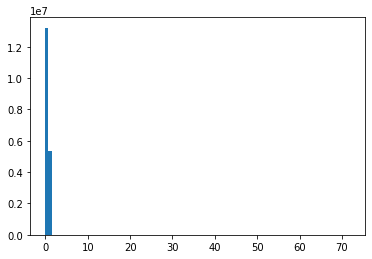

In [22]:
plt.hist(vh_array_inv, bins=100);

In [23]:
data.shape, labels.shape

NameError: name 'labels' is not defined

In [34]:
data[labels==1, :, 0].T.shape

(21, 32707)

In [45]:
def get_mean_confidence(data, conf_upper, conf_lower):
    """
    Args:
        data (numpy.array): dimensions should be (time, length)
    
    Returns:
        mean, upper, lower (tuple): returns a tuple of numpy.array objects
    """
    return np.median(data, axis=1), np.mean(data, axis=1), np.percentile(data, conf_upper, axis=1), np.percentile(data, conf_lower, axis=1)

In [58]:
vv_median, vv_mean, vv_upper, vv_lower = get_mean_confidence(data[labels==1, :, 1].T, 100, 0)
# vh_mean, vh_upper, vh_lower = get_mean_confidence(data[labels==1,...], 95, 5)

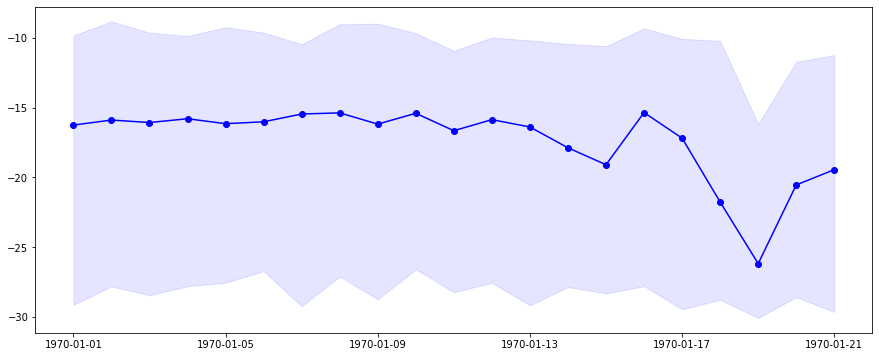

In [59]:
# plot time series
fig, ax = plt.subplots(figsize=(15, 6))

# flood
p1 = ax.plot_date(np.arange(21), vv_median, '-bo'); # plot mean
p2 = ax.fill_between(np.arange(21), vv_upper, vv_lower, alpha=0.1, color='b'); # plot confidence intervals
# no flood
# ax.plot_date(eop_image.timestamp[:-2], vh_mean, '-ro', xdate=True, ydate=False);
# ax.fill_between(eop_image.timestamp[:-2], vh_upper, vh_lower, alpha=0.1, color='r');

# ax.legend(['Flood average', 'No Flood average', 'Flood std', 'No Flood std'], loc='upper left')
# ax.tick_params('x', rotation=45)
# ax.set_ylabel(r'VV $\sigma_0$ [dB]', fontsize=15)
# ax.set_title('Time Series of annotated data', fontsize=23)
# ax.grid();
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

In [32]:
vv_mean.shape

(32707,)

In [ ]:
import requests

# url = 'https://qc.sentinel1.eo.esa.int/'
# url = 'http://aux.sentinel1.eo.esa.int/'
url = 'http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/'
response = requests.get(url)
response.json()